# Analyse du Profil des Patients à Risque de Maladies Cardiaques

**Contexte  :** 

Vous travaillez en tant que data scientist dans une entreprise de santé qui cherche à mieux comprendre les facteurs de risque
associés aux maladies cardiaques. L'objectif est d'analyser le profil des patient.e.s afin d'identifier les caractéristiques
les plus associées à un risque accru de maladie cardiaque. Cette analyse permettra de mieux cibler les efforts de prévention
et d'intervention.

**Problématique :** 

Comment les caractéristiques démographiques et cliniques des patient.e.s influencent-elles le risque de développer une maladie cardiaque ?

**Objectif de ce Notebook :** 

Ce notebook se concentre sur une analyse descriptive univariée des données pour explorer les distributions individuelles des variables 
disponibles dans le **Heart Disease Dataset (Cleveland)**. L'objectif est de fournir une compréhension de base du profil des patients 
et de poser les bases pour des analyses plus approfondies.

## Pourquoi l'Analyse Univariée ?

L'analyse univariée est une étape essentielle pour :
    
- **Comprendre les caractéristiques des données** : Explorer la distribution de chaque variable.
- **Identifier les valeurs extrêmes ou anomalies** : Détecter des patients avec des caractéristiques extrêmes qui pourraient influencer l'analyse.
- **Préparer les données pour des analyses ultérieures** : Vérifier la nécessité de transformations ou d'imputations.


# Importation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv("data/Base_Maladie_Cardiaque.csv")

# Affichage des premières lignes du dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [3]:
# Transformation des types de données : changer cateorie  des variables 
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')

In [4]:
# Pour plusieurs variables a changer, il faut créer une liste de variables,
#ensuite utiliser la fonctionapply()
liste_variable  = ["sex", "cp", "fbs", "restecg", "thal", "target"]
df[liste_variable] = df[liste_variable].apply(lambda x : x.astype("category"))

In [5]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal        category
target      category
dtype: object

In [6]:
df['ca'] = df['ca'].astype('float')

In [7]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca           float64
thal        category
target      category
dtype: object

# Utilisation des Fonctions Lambda en Python

Les fonctions lambda sont des fonctions anonymes définies en une seule ligne. Elles sont couramment utilisées pour les opérations simples qui ne nécessitent pas une fonction complète avec un `def`.

## Syntaxe

```python
lambda arguments: expression


In [5]:
test = lambda x: x * 2
print(test(5))  # Résultat: 10


10


In [6]:
# Transformation de plusieurs variables en utilisant la onction lambda

liste_variable =["sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target"]
df[liste_variable]= df[liste_variable].apply(lambda x: x.astype("category"))
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca             int64
thal        category
target      category
dtype: object


## Description des Variables

Avant de commencer les analyses, il est important de comprendre les variables présentes dans le dataset :

    

| Variable    | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `age`       | Âge du patient.                                                             |
| `sex`       | Sexe du patient (1 = homme, 0 = femme).                                     |
| `cp`        | Type de douleur thoracique (1 = typique, 2 = atypique, 3 = non-angineuse, 4 = asymptomatique). |
| `trestbps`  | Pression artérielle au repos (en mm Hg).                                    |
| `chol`      | Taux de cholestérol sérique (mg/dl).                                        |
| `fbs`       | Glycémie à jeun > 120 mg/dl (1 = vrai; 0 = faux).                           |
| `restecg`   | Résultats de l'électrocardiogramme au repos (0 = normal, 1 = ST-T anormal, 2 = hypertrophie ventriculaire). |
| `thalach`   | Fréquence cardiaque maximale atteinte.                                      |
| `exang`     | Angine induite par l'exercice (1 = oui; 0 = non).                           |
| `oldpeak`   | Dépression ST induite par l'exercice par rapport au repos.                  |
| `slope`     | Pente du segment ST lors de l'exercice (0 = pente descendante, 1 = plate, 2 = ascendante). |
| `ca`        | Nombre de vaisseaux principaux colorés par fluoroscopie (0-3).              |
| `thal`      | Résultat de l'examen sanguin (3 = normal, 6 = fixe, 7 = réversible).        |
| `target`    | Variable cible indiquant la présence (1) ou l'absence (0) de maladie cardiaque. |


## Analyse Univariée des Variables Numériques

Pour les variables numériques, nous allons principalement examiner :
    
- **La distribution** : Via des histogrammes et des boxplots.
- **Les statistiques descriptives** : Moyenne, médiane, écart-type, etc.




### Indicateurs numériques

| Indicateur                 | Description                                                                 | Interprétation                                                                                                   |
|----------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| Moyenne                    | Somme des valeurs divisée par le nombre total d'observations                | Indique la tendance centrale ou l'âge moyen des patients dans l'échantillon                                      |
| Médiane                    | Valeur qui divise l'échantillon en deux parties égales                      | Représente le 50ème percentile, utile lorsque la distribution est asymétrique                                    |
| Mode                       | Valeur la plus fréquente dans l'échantillon                                 | Indique l'âge le plus commun dans l'échantillon                                                                 |
| Écart-type                 | Mesure de la dispersion des valeurs par rapport à la moyenne                | Indique la variabilité ou la dispersion des âges autour de la moyenne                                            |
| Variance                   | Carré de l'écart-type                                                       | Mesure la dispersion des données, en tenant compte des écarts au carré par rapport à la moyenne                  |
| Minimum                    | Valeur la plus basse dans l'échantillon                                     | Indique l'âge minimum des patients                                                                               |
| Maximum                    | Valeur la plus élevée dans l'échantillon                                    | Indique l'âge maximum des patients                                                                               |
| Premier Quartile (Q1)      | Valeur qui divise les 25% les plus bas des 75% restants                     | Représente le 25ème percentile, montrant où se situe le quart inférieur des âges                                 |
| Troisième Quartile (Q3)    | Valeur qui divise les 75% les plus bas des 25% restants                     | Représente le 75ème percentile, montrant où se situe le quart supérieur des âges                                 |
| Intervalle Interquartile (IQR) | Différence entre le troisième et le premier quartile                    | Indique la dispersion centrale des données et aide à détecter les valeurs aberrantes                             |
| Skewness (Asymétrie)       | Mesure de la symétrie de la distribution par rapport à une distribution normale | Indique si la distribution est biaisée à gauche (négative) ou à droite (positive)                                |
| Kurtosis (Aplatissement)   | Mesure de la forme de la distribution, en particulier la queue              | Indique si les données ont des queues lourdes (kurtosis positive) ou légères (kurtosis négative)                 |


In [7]:
# Statistiques descriptives de l'âge
df.age.describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [8]:
from scipy.stats import skew, kurtosis
# Calcul des indicateurs pour la variable 'age'
age = df['age']

# Moyenne
moyenne = age.mean()
print(f"Moyenne : {moyenne}")

# Médiane
mediane = age.median()
print(f"Médiane : {mediane}")

# Mode
mode = age.mode()[0]
print(f"Mode : {mode}")

# Écart-type
ecart_type = age.std()
print(f"Écart-type : {ecart_type}")

# Variance
variance = age.var()
print(f"Variance : {variance}")

# Minimum
min_age = age.min()
print(f"Minimum : {min_age}")

# Maximum
max_age = age.max()
print(f"Maximum : {max_age}")

# Premier Quartile (Q1)
q1 = age.quantile(0.25)
print(f"Premier Quartile (Q1) : {q1}")

# Troisième Quartile (Q3)
q3 = age.quantile(0.75)
print(f"Troisième Quartile (Q3) : {q3}")

# Intervalle Interquartile (IQR)
iqr = q3 - q1
print(f"Intervalle Interquartile (IQR) : {iqr}")

# Skewness (Asymétrie)
asymetrie = skew(age)
print(f"Asymétrie (Skewness) : {asymetrie}")

# Kurtosis (Aplatissement)
aplatissement = kurtosis(age)
print(f"Aplatissement (Kurtosis) : {aplatissement}")

Moyenne : 54.43894389438944
Médiane : 56.0
Mode : 58
Écart-type : 9.038662442446743
Variance : 81.69741874849731
Minimum : 29
Maximum : 77
Premier Quartile (Q1) : 48.0
Troisième Quartile (Q3) : 61.0
Intervalle Interquartile (IQR) : 13.0
Asymétrie (Skewness) : -0.2080240895050745
Aplatissement (Kurtosis) : -0.5345227201725988


In [9]:

# Création d'un dictionnaire avec les indicateurs et leurs interprétations
indicateurs = {
    'Indicateur': [
        'Moyenne',
        'Médiane',
        'Mode',
        'Écart-type',
        'Variance',
        'Minimum',
        'Maximum',
        'Premier Quartile (Q1)',
        'Troisième Quartile (Q3)',
        'Intervalle Interquartile (IQR)',
        'Skewness (Asymétrie)',
        'Kurtosis (Aplatissement)'
    ],
    'Valeur': [
        age.mean(),
        age.median(),
        age.mode()[0],
        age.std(),
        age.var(),
        age.min(),
        age.max(),
        age.quantile(0.25),
        age.quantile(0.75),
        age.quantile(0.75) - age.quantile(0.25),
        skew(age),
        kurtosis(age)
    ],
    'Interprétation': [
        'Indique la tendance centrale ou l'âge moyen des patients.',
        'Représente le 50ème percentile, utile lorsque la distribution est asymétrique.',
        'Indique l'âge le plus commun dans l\'échantillon.',
        'Indique la variabilité ou la dispersion des âges autour de la moyenne.',
        'Mesure la dispersion des données, en tenant compte des écarts au carré par rapport à la moyenne.',
        'Indique l'âge minimum des patients.',
        'Indique l'âge maximum des patients.',
        'Représente le 25ème percentile, montrant où se situe le quart inférieur des âges.',
        'Représente le 75ème percentile, montrant où se situe le quart supérieur des âges.',
        'Indique la dispersion centrale des données et aide à détecter les valeurs aberrantes.',
        'Indique si la distribution est biaisée à gauche (négative) ou à droite (positive).',
        'Indique si les données ont des queues lourdes (kurtosis positive) ou légères (kurtosis négative).'
    ]
}

# Conversion du dictionnaire en DataFrame
indicateurs_df = pd.DataFrame(indicateurs)
indicateurs_df

,Indicateur,Valeur,Interprétation
0,Moyenne,54.438944,Indique la tendance centrale ou l'âge moyen de...
1,Médiane,56.000000,"Représente le 50ème percentile, utile lorsque ..."
2,Mode,58.000000,Indique l'âge le plus commun dans l'échantillon.
3,Écart-type,9.038662,Indique la variabilité ou la dispersion des âg...
4,Variance,81.697419,"Mesure la dispersion des données, en tenant co..."
5,Minimum,29.000000,Indique l'âge minimum des patients.
6,Maximum,77.000000,Indique l'âge maximum des patients.
7,Premier Quartile (Q1),48.000000,"Représente le 25ème percentile, montrant où se..."
8,Troisième Quartile (Q3),61.000000,"Représente le 75ème percentile, montrant où se..."
9,Intervalle Interquartile (IQR),13.000000,Indique la dispersion centrale des données et ...



#### 1. Skewness (Asymétrie) :
- **Skewness** de la loi normale est **0**.
- Cela signifie que la distribution est parfaitement symétrique autour de la moyenne. Il n'y a pas de biais vers la gauche ou la droite.

#### 2. Kurtosis (Aplatissement) :
- **Kurtosis** pour la loi normale est **3**.
- Cependant, dans de nombreuses implémentations, on parle souvent du **kurtosis excès** (excess kurtosis), qui est calculé comme le kurtosis moins 3. Cela signifie que pour une distribution normale, l'excess kurtosis est **0**.
- Une kurtosis de 3 (ou un excess kurtosis de 0) indique que la distribution a une forme de pic et des queues similaires à celles de la distribution normale.


- **Statistiques descriptives** : La moyenne d'âge est d'environ 54 ans, ce qui est typique pour une population à risque 
  de maladies cardiaques. L'âge minimum est de 29 ans et l'âge maximum est de 77 ans, ce qui indique que le dataset 
  couvre une large plage d'âges.

- **Interprétation des quantiles** : Le premier quartile (Q1) se situe autour de 48 ans, le deuxième quartile (Q2 ou médiane) 
  est à environ 55 ans, et le troisième quartile (Q3) est à environ 61 ans. Cela signifie que 25 % des patients ont 48 ans ou moins, 
  50 % ont 55 ans ou moins, et 75 % ont 61 ans ou moins. Ces informations aident à comprendre la répartition des âges et à identifier 
  les groupes d'âge à risque.

### Les Graphiques à mettre en place sur des variables numériques

| Graphique                  | Description | Interprétation |
|----------------------------|-------------|----------------|
| Histogramme                | Représente la distribution de la variable quantitative en divisant les données en intervalles (bins). | Permet d'identifier la forme de la distribution (normale, asymétrique, bimodale), les tendances centrales, et la présence de valeurs extrêmes. |
| Boxplot                    | Montre la distribution de la variable et les valeurs aberrantes (outliers). | Permet d'identifier la médiane, les quartiles, et les valeurs extrêmes. Utile pour repérer des outliers et comprendre la dispersion des données. |
| Courbe de densité a(KDE)    | Estimation de la densité de probabilité de la variable. | Fournit une vue lissée de la distribution, idéale pour observer la forme globale sans être influencé par la taille des bins. Aide à comprendre la "lisse" distribution des données. |
| Violin plot                | Combine les aspects d'un boxplot et d'une courbe de densité (KDE). | Visualise la distribution complète de la variable tout en affichant les quartiles et la médiane. Utile pour comprendre les distributions asymétriques ou multimodales. |
| Quantile-Quantile Plot (QQ Plot) | Compare la distribution de la variable avec une distribution théorique (généralement normale). | Permet de vérifier si la distribution de la variable suit une distribution théorique. Les déviations par rapport à la ligne droite indiquent des écarts par rapport à la distribution normale. |


#### Histogramme

L'histogramme est utilisé pour visualiser la distribution des données. Il divise les données en intervalles (bins) et montre la fréquence des valeurs dans chaque intervalle. Cela aide à identifier la forme générale de la distribution (normale, asymétrique, bimodale) et à détecter les valeurs extrêmes.


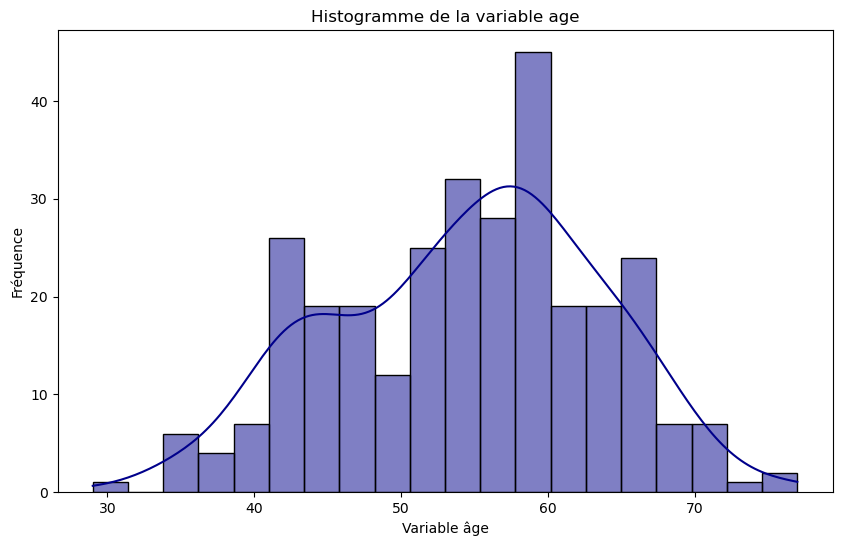

In [10]:

# Distribution de l'âge des patients
# 1. Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df.age, bins=20, kde=True, color='darkblue')
plt.title("Histogramme de la variable age")
plt.xlabel("Variable âge")
plt.ylabel('Fréquence')
plt.show()



 - **Distribution** : La distribution de l'âge semble être assez symétrique avec une légère inclinaison à droite. 
    Cela signifie qu'il y a une légère concentration de patients dans les tranches d'âge plus élevées.

#### Le Boxplot

Le boxplot est utilisé pour résumer la distribution d'une variable en visualisant ses quartiles, sa médiane, et les valeurs aberrantes (outliers). Il est particulièrement utile pour identifier les valeurs extrêmes et comparer la dispersion entre différents groupes.

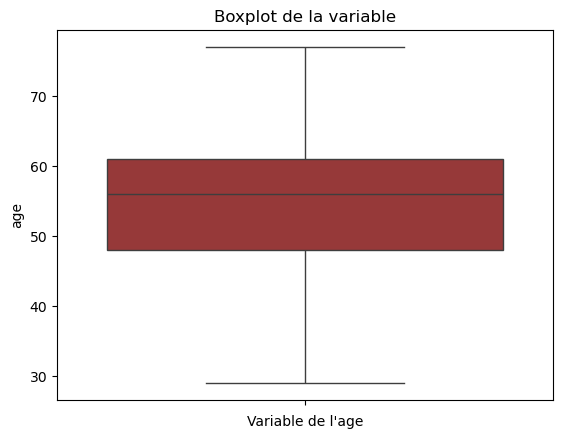

In [11]:
# Boxplot de l'âge des patients
# 2. Boxplot
sns.boxplot(df.age, color='brown')
plt.title("Boxplot de la variable")
plt.xlabel("Variable de l'age")
plt.show()



In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0.0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3.0,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2.0,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0.0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0.0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2.0,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1.0,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1.0,1,1


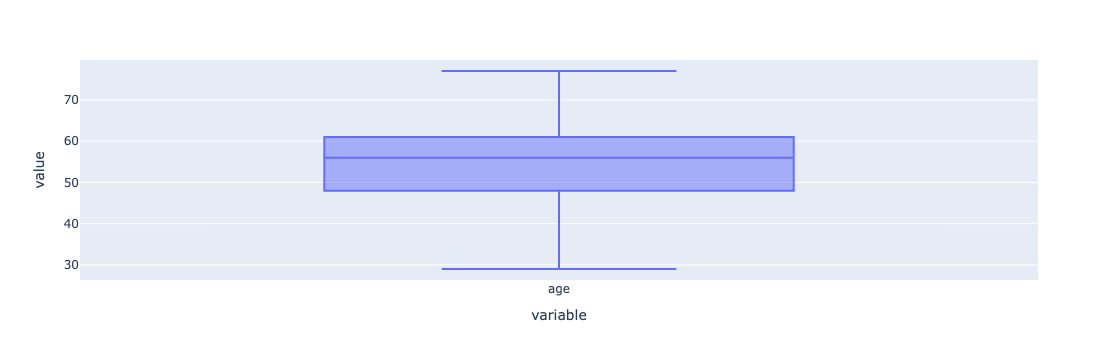

In [13]:
import plotly.express as px

# Boxplot de l'âge des patients avec Plotly
fig = px.box(df.age)
fig.show()

#### Courbe de densité

La courbe de densité (KDE) fournit une estimation lissée de la distribution des données. Contrairement à l'histogramme, elle n'est pas influencée par la taille des bins. Elle aide à visualiser la probabilité de densité d'une variable et à comprendre la distribution globale.

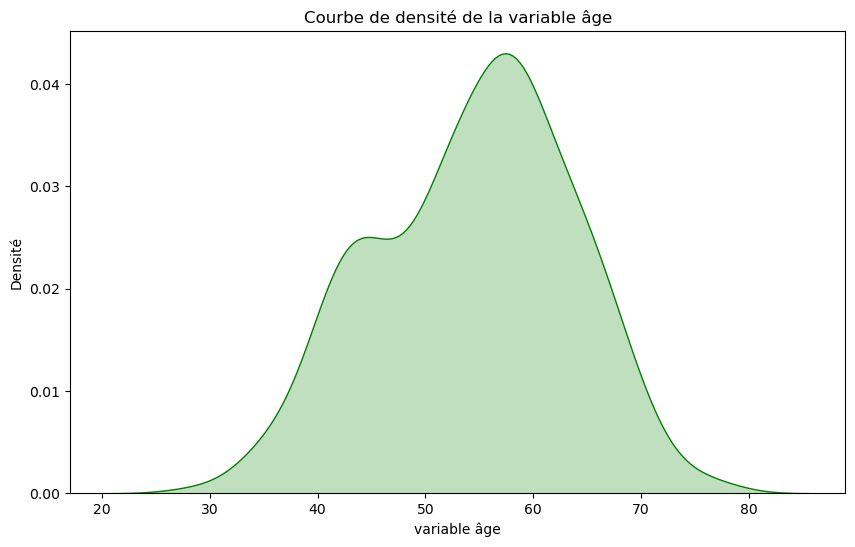

In [14]:
# 3. Courbe de densité (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df.age, fill=True, color='green')
plt.title("Courbe de densité de la variable âge")
plt.xlabel('variable âge')
plt.ylabel('Densité')
plt.show()



#### Violin plot

Le violin plot combine les aspects du boxplot et de la courbe de densité (KDE). Il montre non seulement les quartiles et la médiane, mais aussi la distribution complète des données. Il est particulièrement utile pour comparer les distributions entre plusieurs groupes.

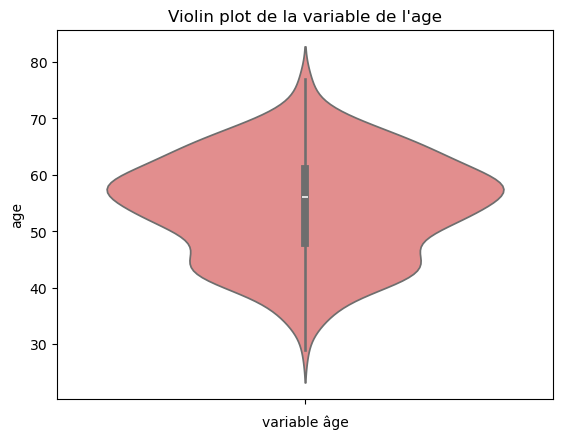

In [15]:
# 4. Violin plot
sns.violinplot(df.age, color='lightcoral')
plt.title("Violin plot de la variable de l'age")
plt.xlabel('variable âge')
plt.show()

#### QQ PLot

Le QQ plot (Quantile-Quantile Plot) est utilisé pour comparer la distribution d'une variable avec une distribution théorique, généralement la distribution normale. Ce graphique est utile pour vérifier si une variable suit une distribution normale. Les déviations par rapport à la ligne droite indiquent des écarts par rapport à la distribution normale.

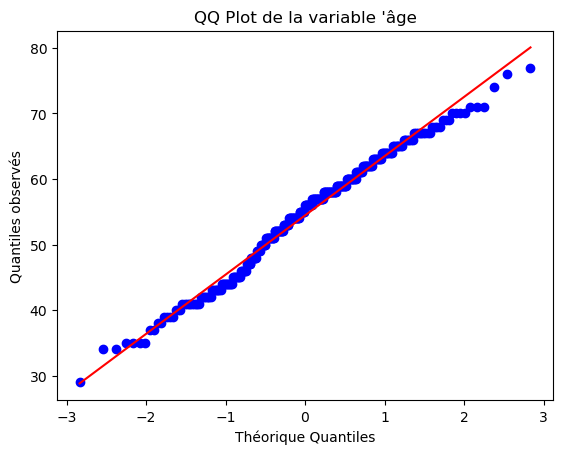

In [16]:
# 5. QQ Plot
stats.probplot(df.age, dist="norm", plot=plt)
plt.title("QQ Plot de la variable 'âge")
plt.xlabel('Théorique Quantiles')
plt.ylabel('Quantiles observés')
plt.show()

In [17]:
###Interpretation du QQ plot ##
###Si tous les points en bleu sont sur la ligne rouge, les données sont normalement distribués.###

## Analyse Univariée des Variables Catégorielles

Pour les variables catégorielles, nous allons examiner :
- **La répartition des catégories** : Permet de comprendre la diversité au sein de la variable.    
- **La fréquence des catégories** : Via des barplots.
    

### Résumé numérique 

| **Grandeur**                         | **Description**                                                                                          | **Interprétation**                                                                                                     |
|--------------------------------------|----------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| **Fréquence absolue**                | Nombre de fois qu'une catégorie apparaît dans la variable.                                                | Montre combien de fois chaque catégorie apparaît dans l'ensemble des données.                                           |
| **Mode**                             | Catégorie la plus fréquente dans la variable.                                                             | Indique la catégorie la plus courante dans l'ensemble des données.                                                     |
| **Proportion**                       | Fraction d'observations d'une certaine catégorie par rapport à l'ensemble des données.                    | Aide à comprendre la répartition des catégories par rapport au total.                                                  |


In [18]:
# frequence
frequence = df.sex.value_counts()
frequence

sex
1    206
0     97
Name: count, dtype: int64

In [19]:
# Proportion
proportion = df.sex.value_counts(normalize = True)
proportion

sex
1    0.679868
0    0.320132
Name: proportion, dtype: float64

In [20]:
# Mode
mode = df.sex.mode()
mode

0    1
Name: sex, dtype: category
Categories (2, int64): [0, 1]

In [21]:
tableau_resultat = pd.DataFrame(
    {
    'Catégorie': frequence.index,
    'Effectifs': frequence.values,
    'Proportion': proportion.values

    }
)
tableau_resultat

,Catégorie,Effectifs,Proportion
0,1,206,0.679868
1,0,97,0.320132


In [22]:
df.sex.unique()

[1, 0]
Categories (2, int64): [0, 1]

In [23]:
df.sex.nunique()

2

In [24]:
from scipy.stats import entropy
# Variable qualitative
variable = df['sex']

# Calcul des grandeurs univariées
frequence_absolue = variable.value_counts()
proportion = variable.value_counts(normalize=True) * 100
mode = variable.mode()[0]



# Création d'un DataFrame pour afficher les résultats
tableau_qualitative = pd.DataFrame({
    'Catégorie': frequence_absolue.index,
    'Fréquence absolue': frequence_absolue.values,
    'Proportion (%)': proportion.values,
    'Mode': [mode] + [''] * (len(frequence_absolue) - 1),

})

# Affichage du tableau
tableau_qualitative

,Catégorie,Fréquence absolue,Proportion (%),Mode
0,1,206,67.986799,1
1,0,97,32.013201,


In [25]:
# Fréquence des catégories
df['sex'].value_counts(normalize=True)

sex
1    0.679868
0    0.320132
Name: proportion, dtype: float64

#### Graphiques pour variable qualitatives

| **Graphique**                 | **Description**                                                                 | **Interprétation**                                                                                                   |
|-------------------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **Diagramme en barres (Bar plot)** | Représente les fréquences absolues ou relatives des différentes catégories.    | Permet de visualiser la répartition des catégories et d'identifier la catégorie dominante ou les catégories les plus fréquentes. |
| **Diagramme circulaire (Pie chart)** | Montre la part de chaque catégorie par rapport à l'ensemble, sous forme de parts d'un cercle. | Utilisé pour visualiser la proportion de chaque catégorie dans l'ensemble, utile pour les données avec peu de catégories. |
| **Diagramme en secteurs (Donut chart)** | Variante du diagramme circulaire avec un espace central vide.                 | Similaire au pie chart, avec un design différent, souvent utilisé pour mettre en valeur des comparaisons.            |


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/cl/nt3sdpz13pv5yg1tkd80s_n40000gp/T/ipykernel_3340/352203322.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='sex', ylabel='count'>

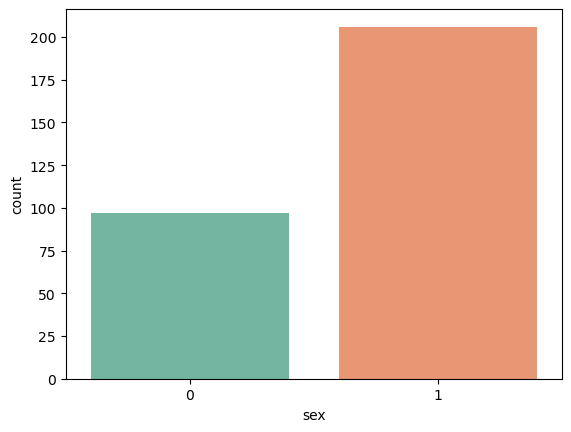

In [27]:
sns.countplot(x= "sex", data=df, palette="Set2")

/var/folders/cl/nt3sdpz13pv5yg1tkd80s_n40000gp/T/ipykernel_3340/2249397795.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




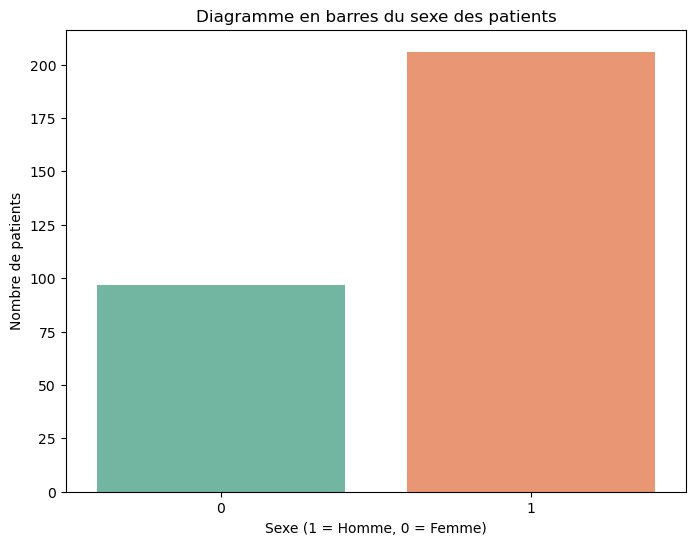

In [28]:

# Diagramme en barres pour la variable 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Diagramme en barres du sexe des patients')
plt.xlabel('Sexe (1 = Homme, 0 = Femme)')
plt.ylabel('Nombre de patients')
plt.show()



/var/folders/cl/nt3sdpz13pv5yg1tkd80s_n40000gp/T/ipykernel_3340/2213808615.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




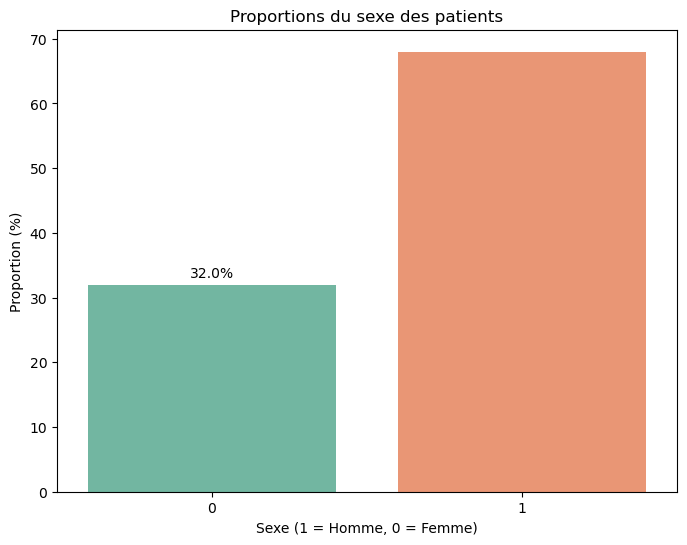

In [29]:
# Calculer les proportions pour chaque catégorie
proportions = df['sex'].value_counts(normalize=True) * 100

# Créer le bar plot avec les proportions
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=proportions.index, y=proportions.values, palette='Set2')

# Ajouter les étiquettes des proportions sur chaque barre
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)

# Configurer le titre et les labels
plt.title('Proportions du sexe des patients')
plt.xlabel('Sexe (1 = Homme, 0 = Femme)')
plt.ylabel('Proportion (%)')
plt.show()

In [25]:
proportion = df.sex.value_counts(normalize = True)
proportion

sex
1    0.679868
0    0.320132
Name: proportion, dtype: float64

/var/folders/cl/nt3sdpz13pv5yg1tkd80s_n40000gp/T/ipykernel_13644/2500947096.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportion.index, y=proportion.values, palette="Set2")


<Axes: xlabel='sex'>

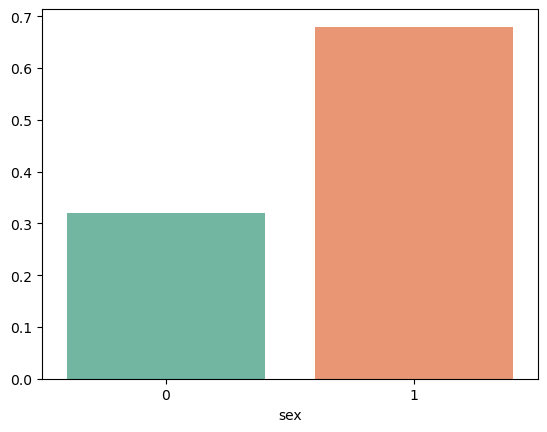

In [26]:
ax=sns.barplot(x=proportion.index, y=proportion.values, palette="Set2")
ax.bar_label

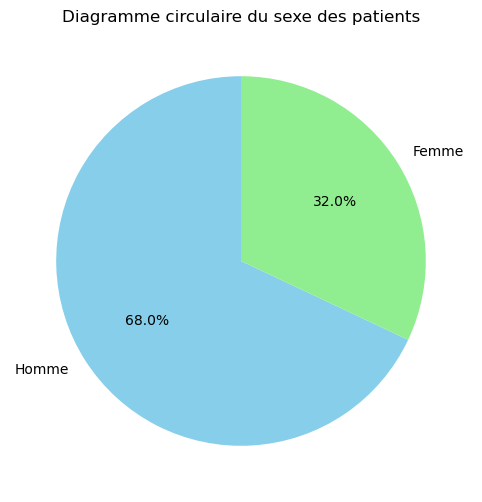

In [30]:
plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], labels=['Homme', 'Femme'], startangle=90)
plt.title('Diagramme circulaire du sexe des patients')
plt.ylabel('')  # Pour enlever le label automatique de pandas
plt.show()

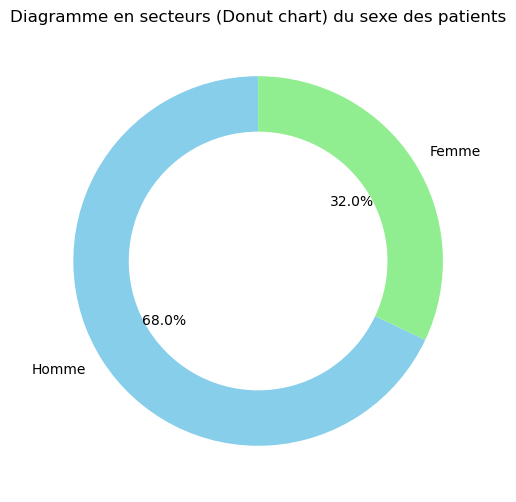

In [31]:
# Diagramme en secteurs (Donut chart) pour la variable 'sex'
plt.figure(figsize=(8, 6))
values = df['sex'].value_counts()
plt.pie(values, labels=['Homme', 'Femme'], colors=['skyblue', 'lightgreen'], autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.3})
plt.title('Diagramme en secteurs (Donut chart) du sexe des patients')
plt.show()


## Automatisation de la description des variable quantitatives

In [ ]:
# Obtenir automatiquement la liste des variables quantitatives

In [7]:
liste_variable_quanti = df.select_dtypes(include=['number']).columns.tolist()
liste_variable_quanti

['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

In [8]:
### Résumé numérique de la liste des variables quantitatives
df[liste_variable_quanti].describe()

,age,trestbps,chol,thalach,exang,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,0.326733,1.039604,0.600660,0.663366
std,9.038662,17.599748,51.776918,22.875003,0.469794,1.161075,0.616226,0.934375
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.000000,0.800000,1.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,1.000000,6.200000,2.000000,3.000000


In [9]:
  # Statistiques descriptives des variables quantitatives
moyenne = df[liste_variable_quanti].mean()
max_val = df[liste_variable_quanti].max()
min_val = df[liste_variable_quanti].min()
std = df[liste_variable_quanti].std()
var = df[liste_variable_quanti].var()

q1 = df[liste_variable_quanti].quantile(0.25)
q3 = df[liste_variable_quanti].quantile(0.75)

statistique_desc = pd.DataFrame(
    {
    "Moyenne": moyenne,
    "Max": max_val,
    "Min": min_val,
    "Ecart_type": std,
    "Variance": var,
    "Q1": q1,
    "Q3": q3
    }
)

statistique_desc

,Moyenne,Max,Min,Ecart_type,Variance,Q1,Q3
age,54.438944,77.0,29.0,9.038662,81.697419,48.0,61.0
trestbps,131.689769,200.0,94.0,17.599748,309.751120,120.0,140.0
chol,246.693069,564.0,126.0,51.776918,2680.849190,211.0,275.0
thalach,149.607261,202.0,71.0,22.875003,523.265775,133.5,166.0
exang,0.326733,1.0,0.0,0.469794,0.220707,0.0,1.0
oldpeak,1.039604,6.2,0.0,1.161075,1.348095,0.0,1.6
slope,0.600660,2.0,0.0,0.616226,0.379735,0.0,1.0
ca,0.663366,3.0,0.0,0.934375,0.873058,0.0,1.0


In [10]:


def statDesc(base):
    """
        Cette fonction permet de réaliser les statistiques descriptives sur toutes les variables quantitatives d'une base de données
        df: la base de données à utiliser
    """

    #Determination de la liste des variables quantitatives 
    liste_variable_quanti = base.select_dtypes(include=['number']).columns.tolist()
        
    #calculdes résumés numériques

    moyenne = base[liste_variable_quanti].mean()
    max_val = base[liste_variable_quanti].max()
    min_val = base[liste_variable_quanti].min()
    ecart_type = base[liste_variable_quanti].std()
    variance = base[liste_variable_quanti].var()
    q1 = df[liste_variable_quanti].quantile(0.25)
    q3 = df[liste_variable_quanti].quantile(0.75)

stat_desc = pd.DataFrame
(
    {
    "Moyenne": moyenne,
    "Max": max_val,
    "Min": min_val,
    "Ecart_type": std,
    "Variance": var,
    "Q1": q1,
    "Q3": q3
    }
)
stat_desc

pandas.core.frame.DataFrame

In [20]:
Resume_numerique_Quanti(df)

NameError: name 'Resume_numerique_Quanti' is not defined

In [11]:
# Automatisation de la génération des graphiques
def graphique_quanti(base):
    
    #Détermination de la liste des variables quantitative
    liste_variable_quanti = base.select_dtypes(include=['number']).columns.tolist()
    for i in liste_variable_quanti:
        
   
        #Histogramme
        
        sns.histplot(base[i], bins= 30, color = "lightblue")
        plt.title(f"Histogramme de la variable {i}")
        plt.show()
    
        # Boxplot
        sns.boxplot(base[i], color = "lightgreen")
        plt.title(f"Boxplot de la variable {i}")
        plt.xlabel(f"Variable {i}")
        plt.show()
    
        #Courbe de densité
        sns.kdeplot(base[i], color ="blue", fill = True)
        plt.show()
    
        #Violin plot
        sns.violinplot(base[i])
        plt.show()
    
        ## QQPLot
        stats.probplot(base[i], dist="norm", plot=plt)
        plt.show()
    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



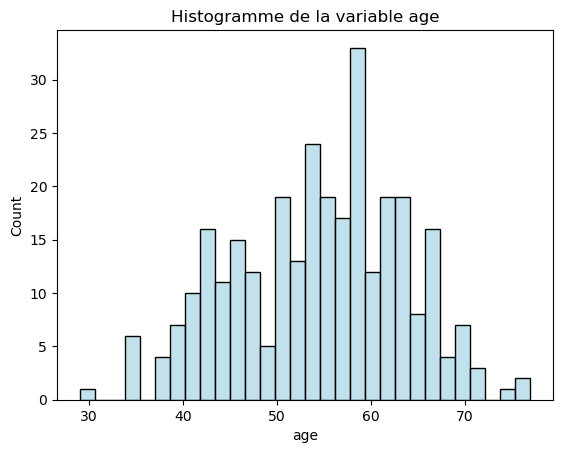

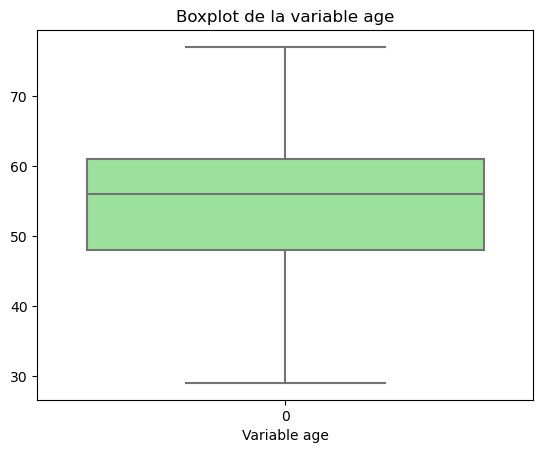

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



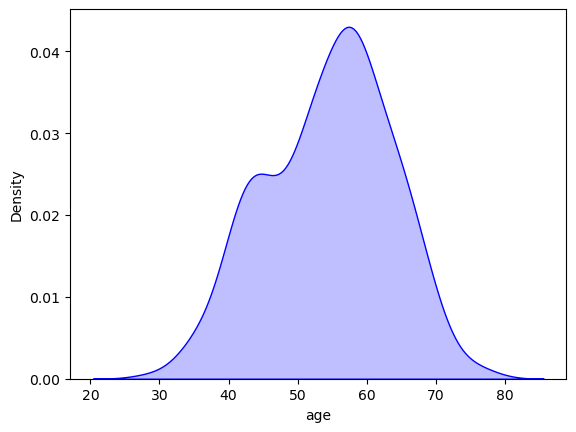

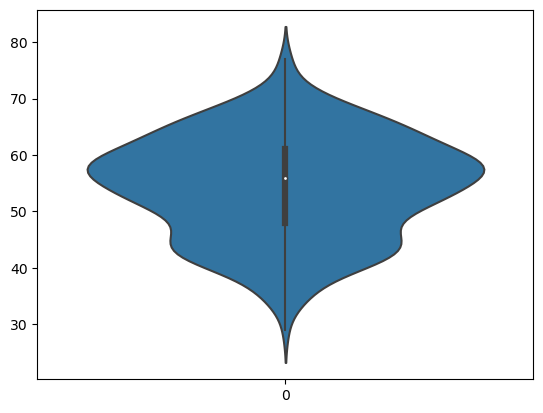

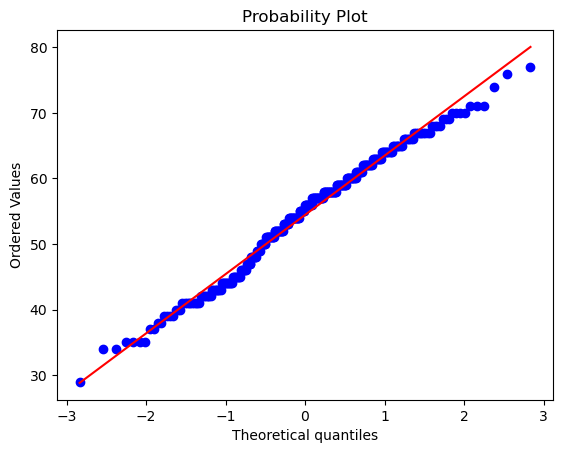

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



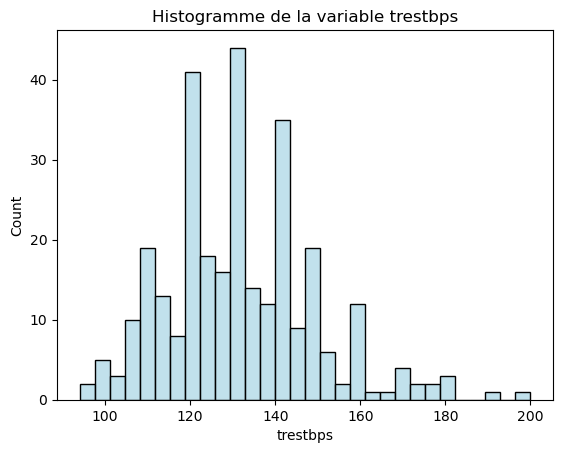

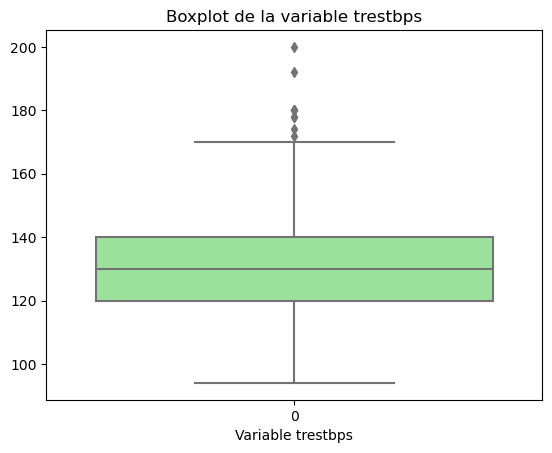

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



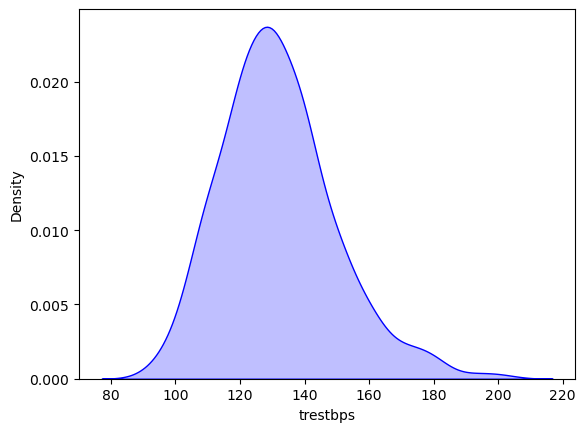

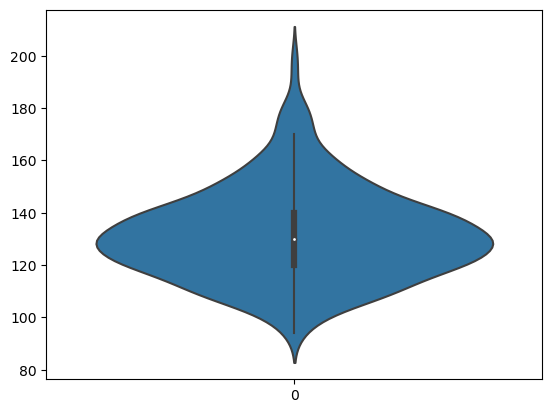

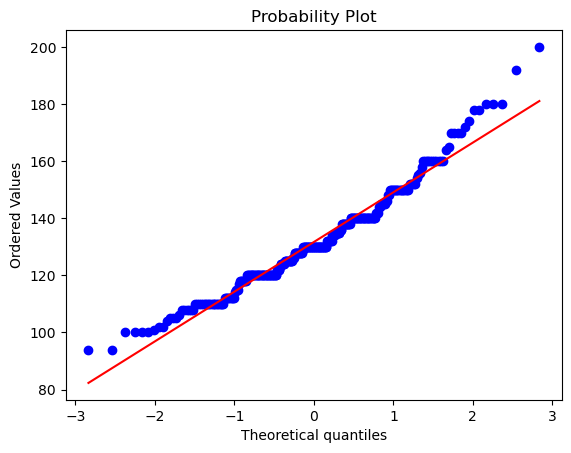

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



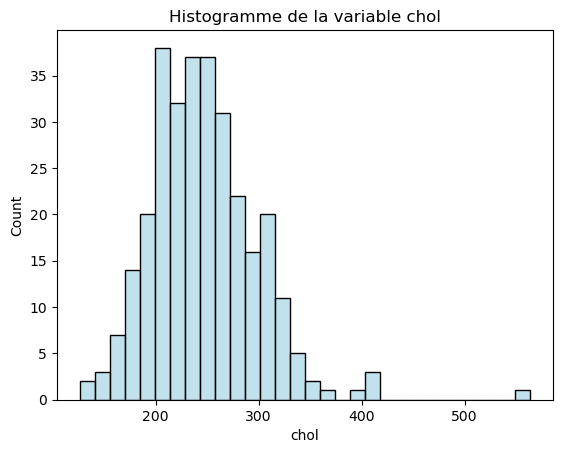

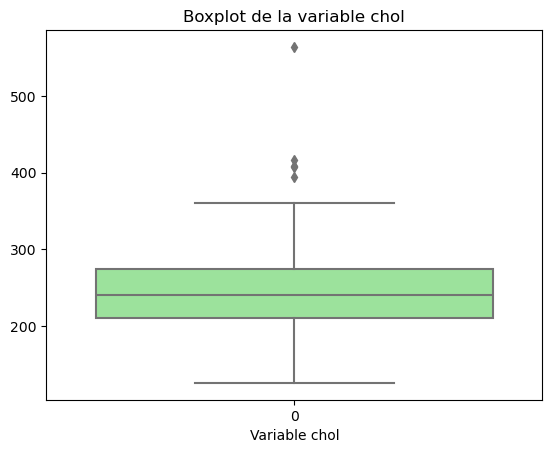

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



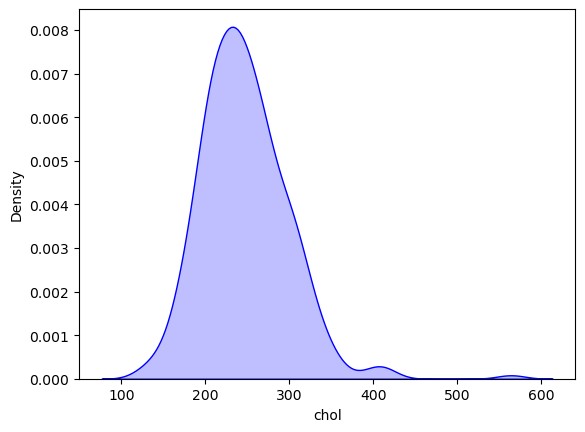

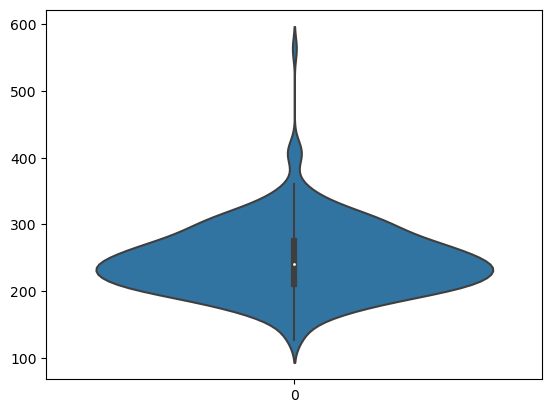

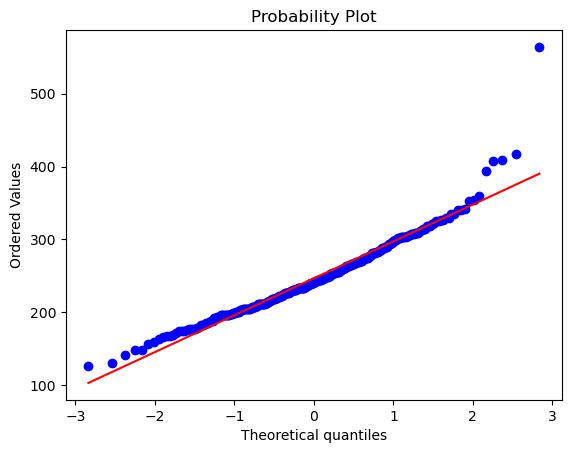

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



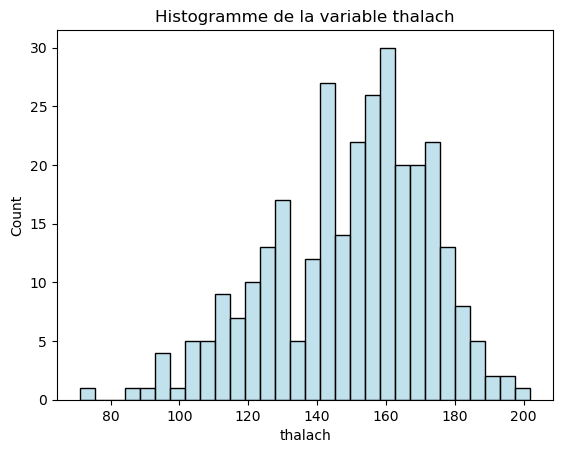

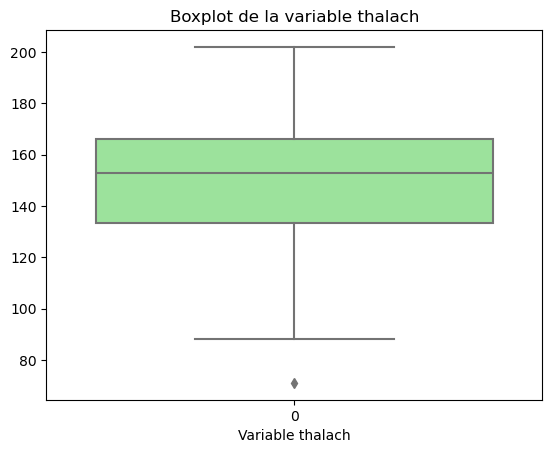

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



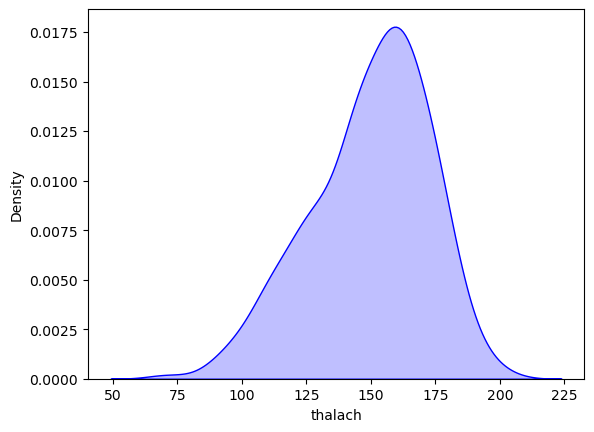

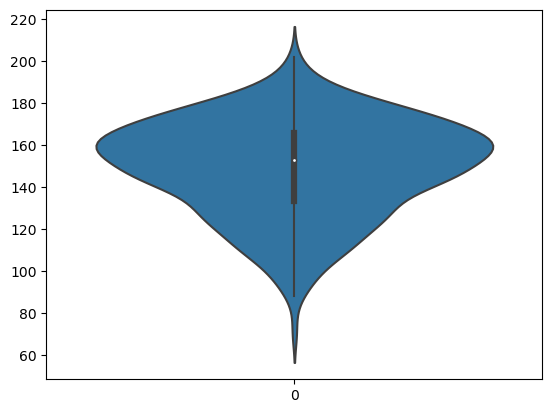

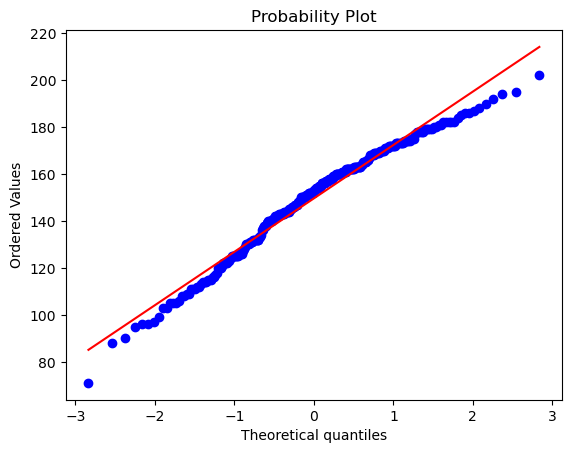

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



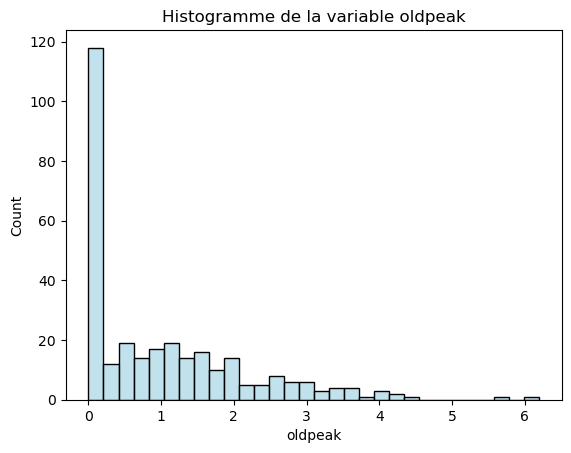

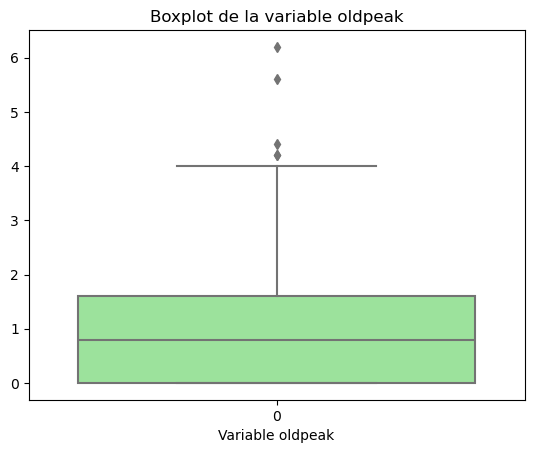

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



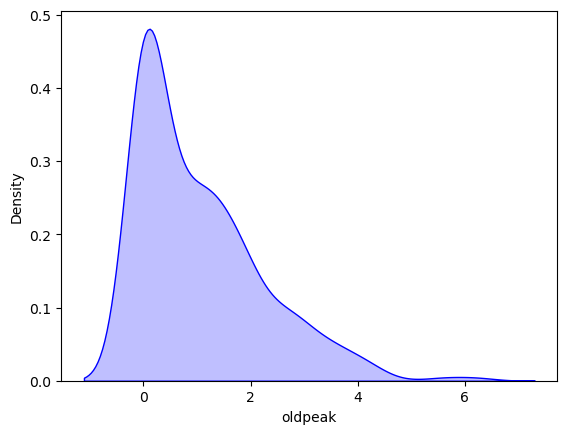

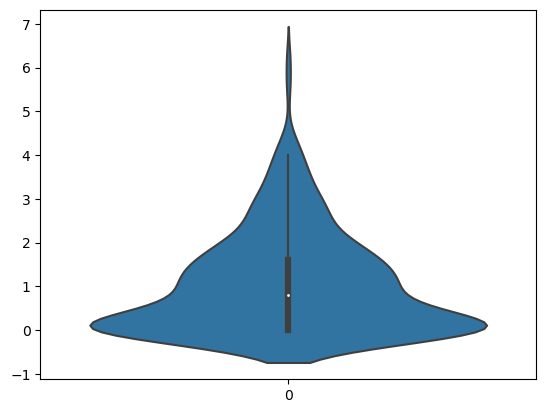

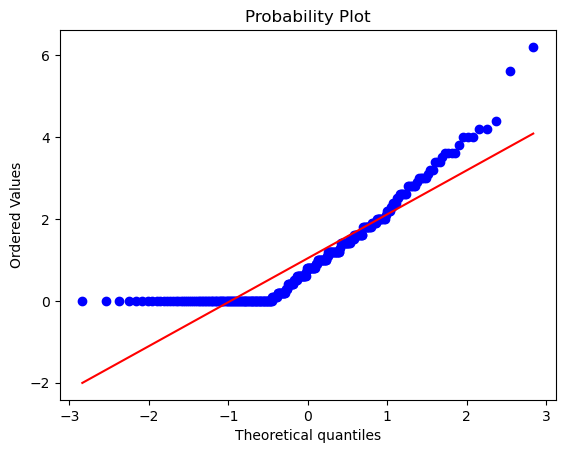

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



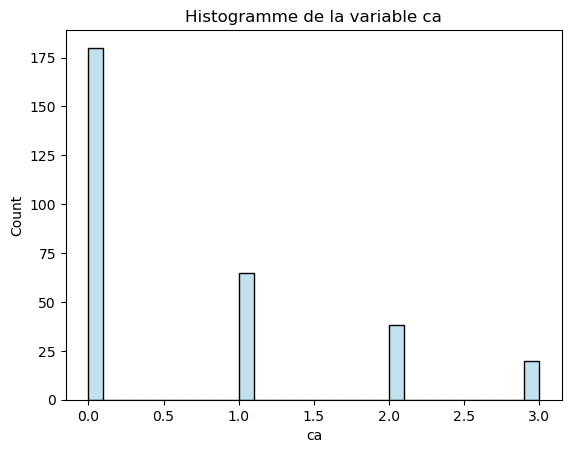

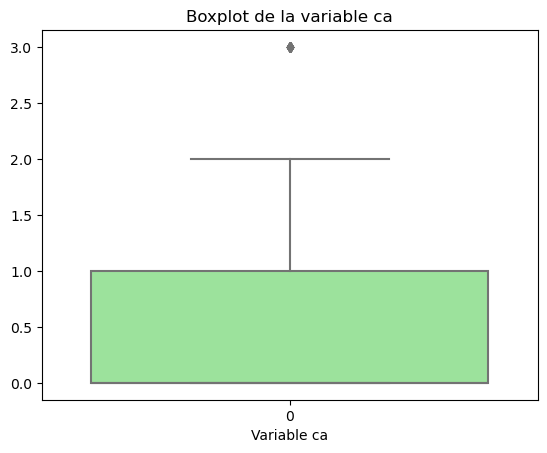

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



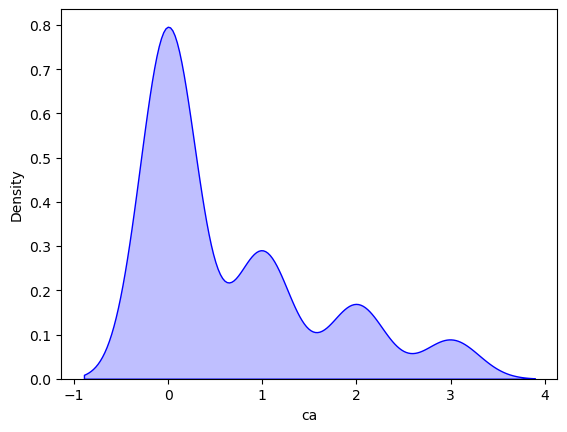

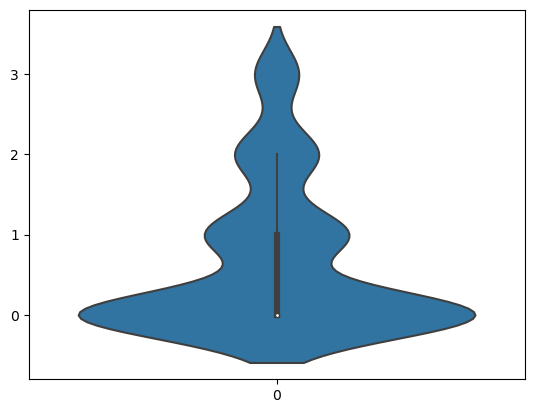

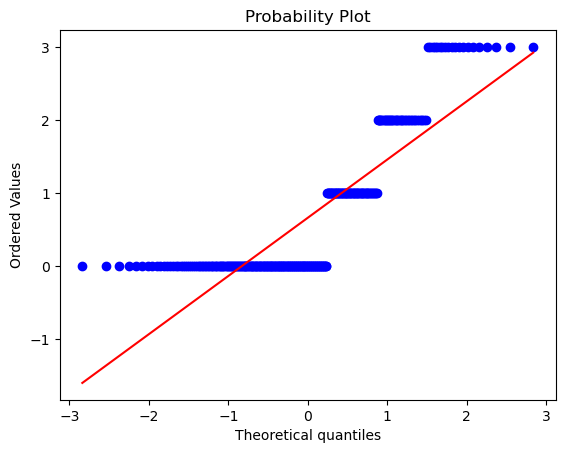

In [132]:
graphique_quanti(df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



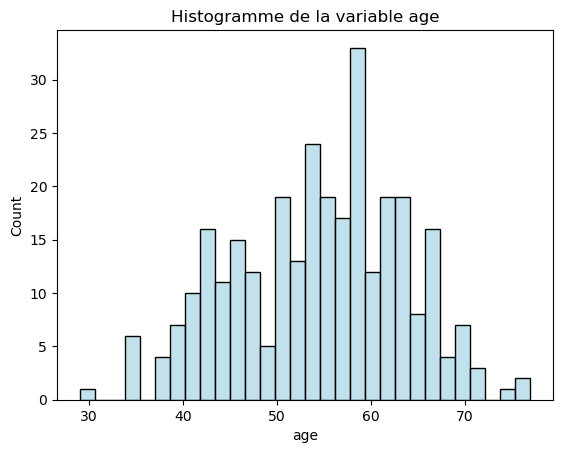

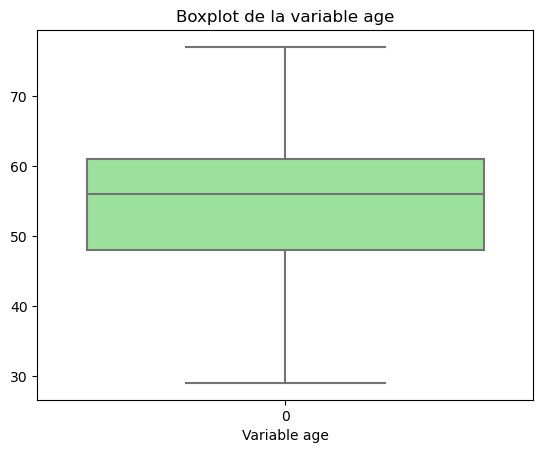

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



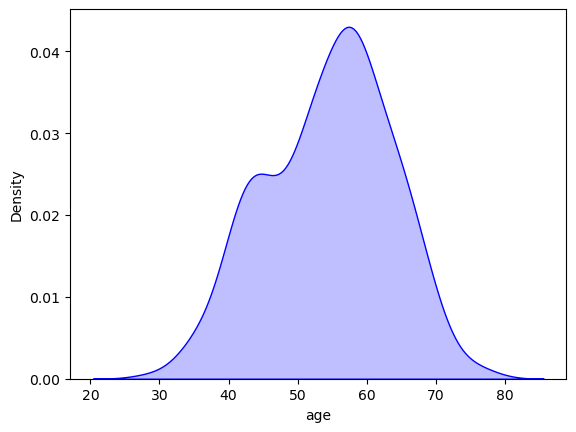

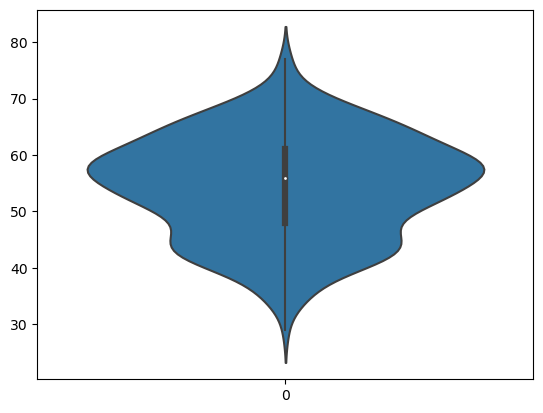

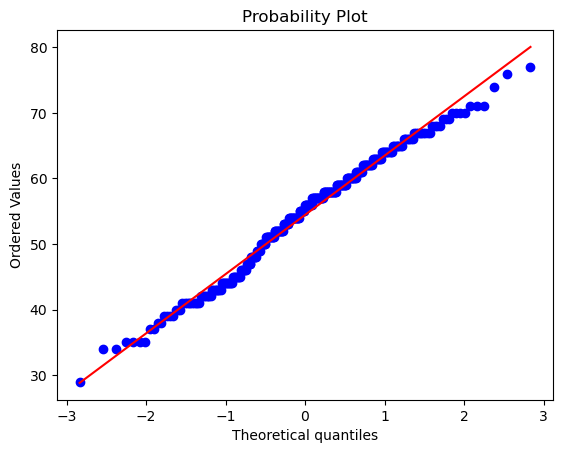

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



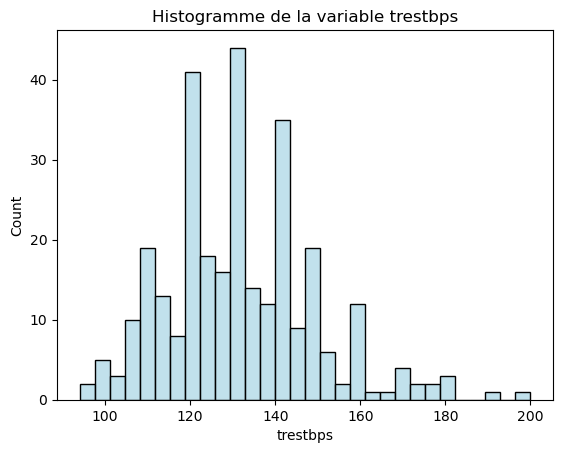

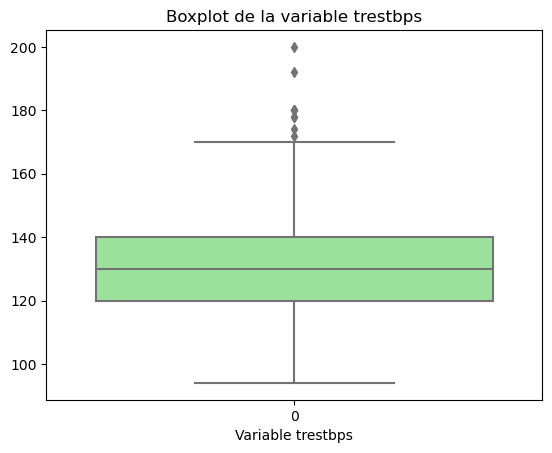

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



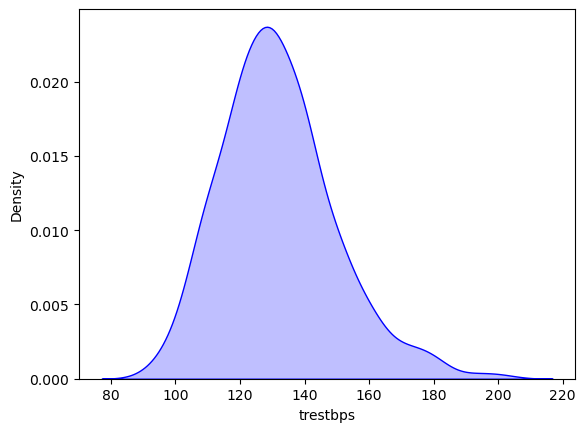

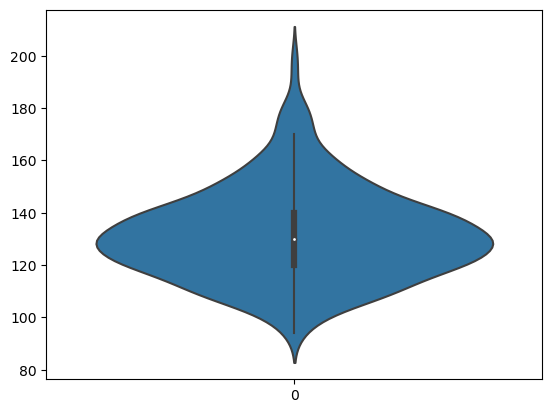

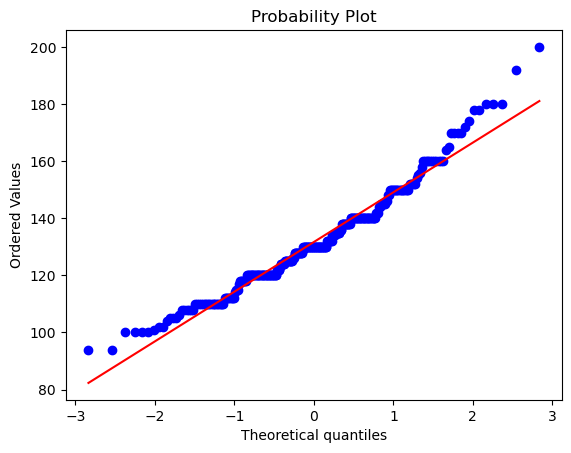

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



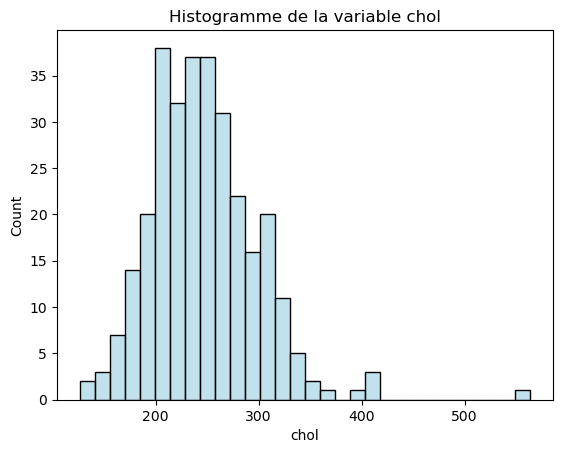

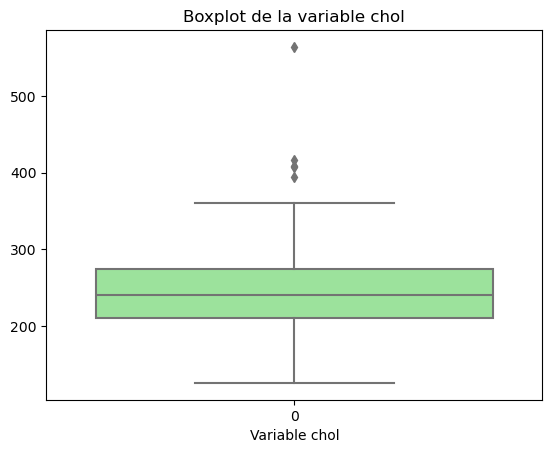

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



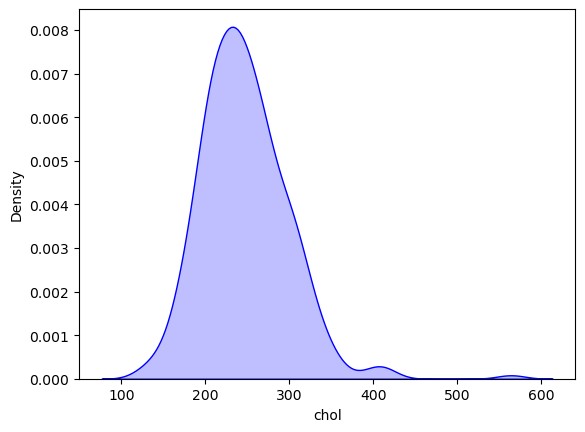

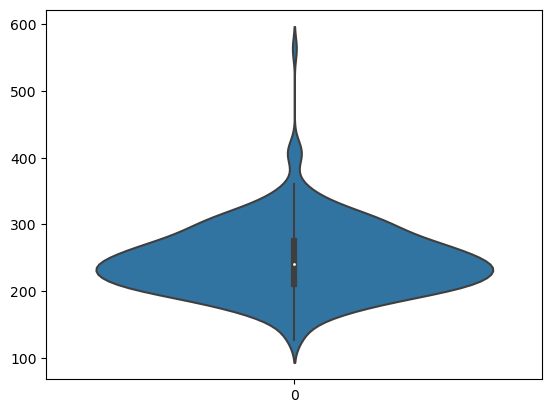

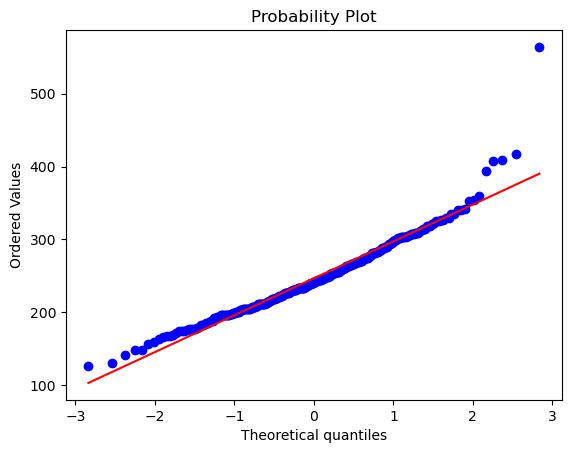

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



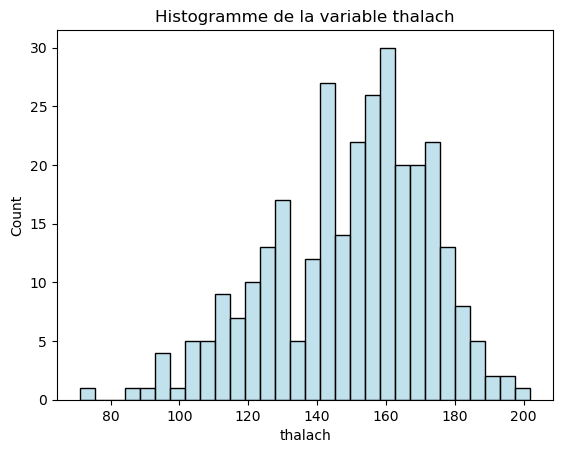

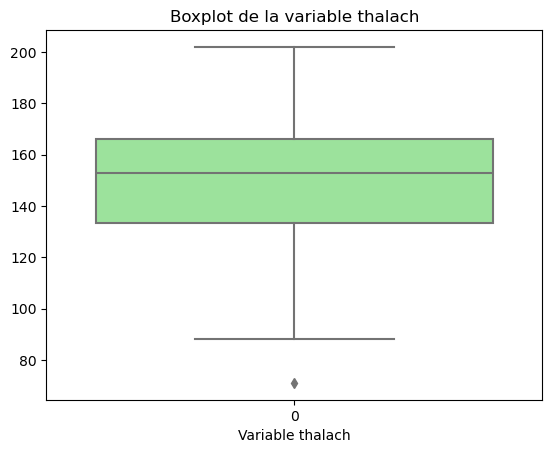

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



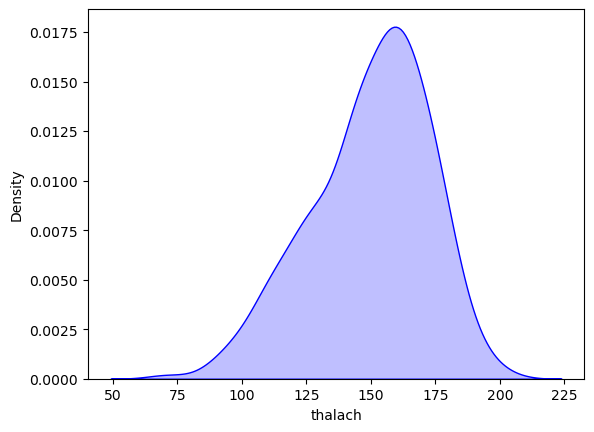

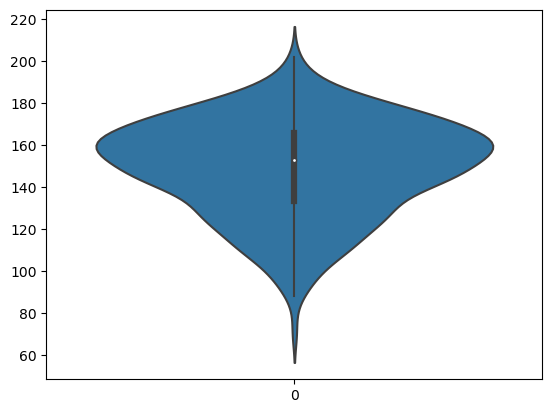

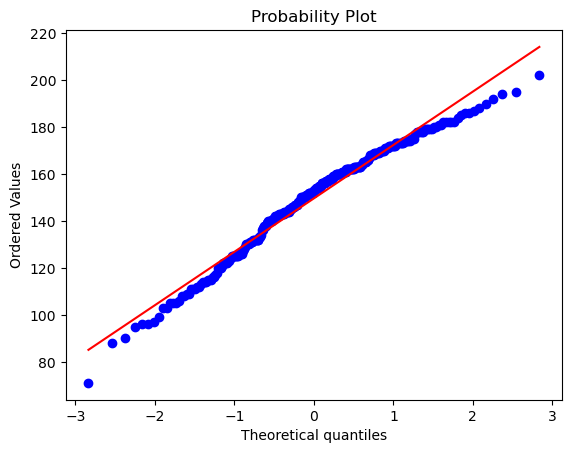

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



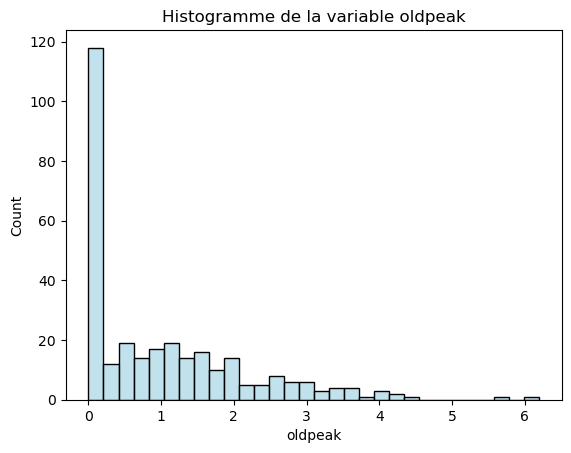

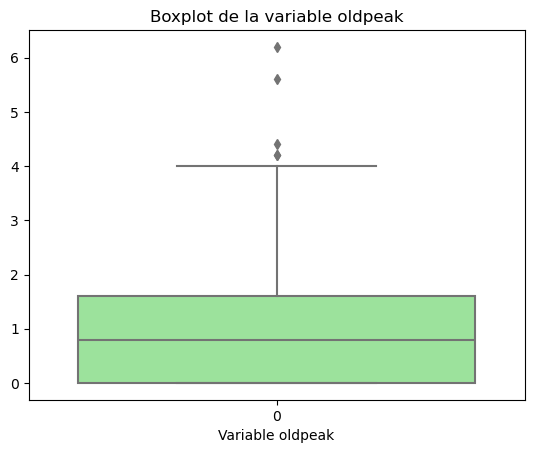

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



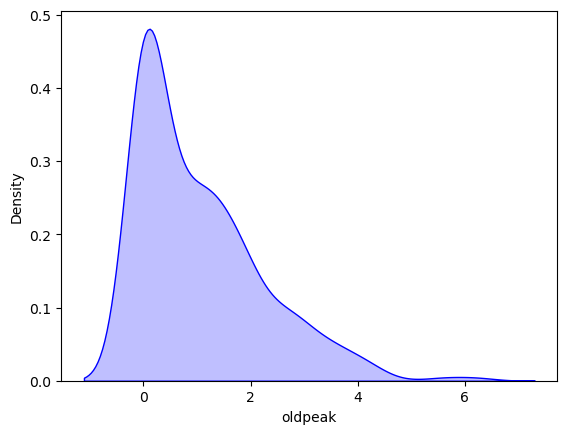

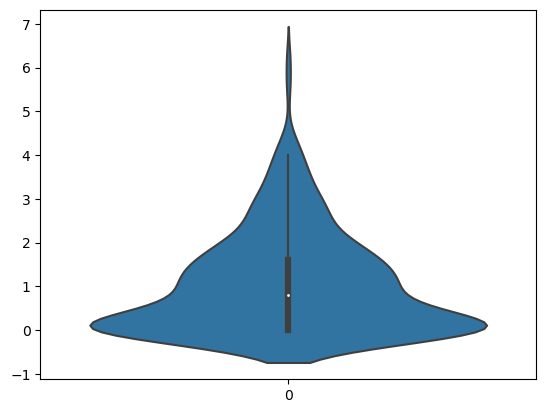

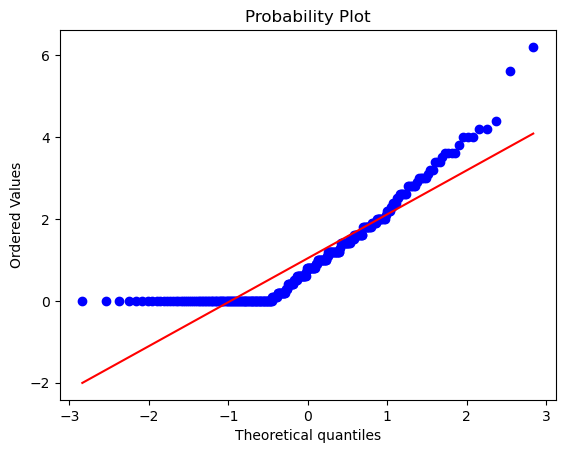

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



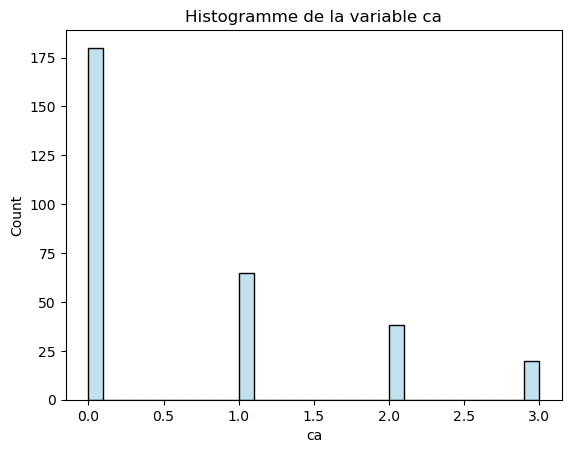

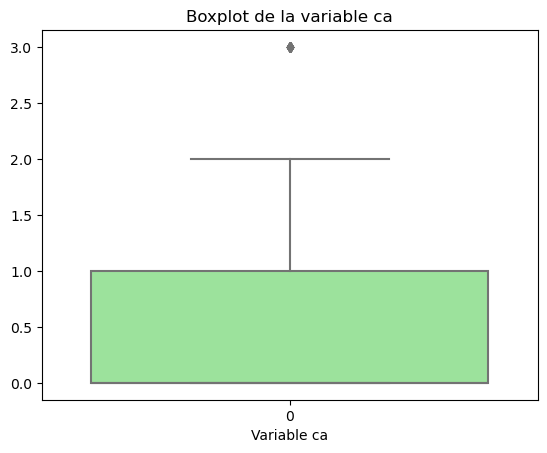

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



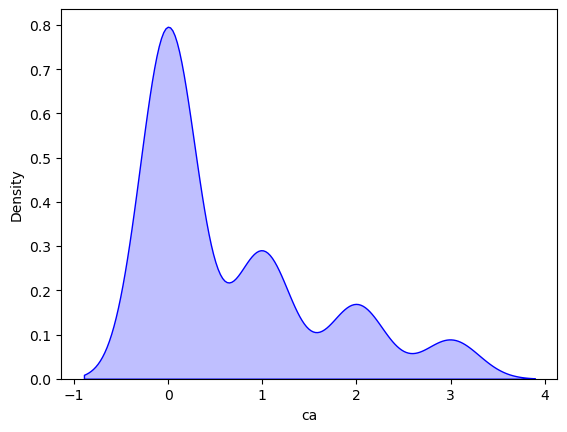

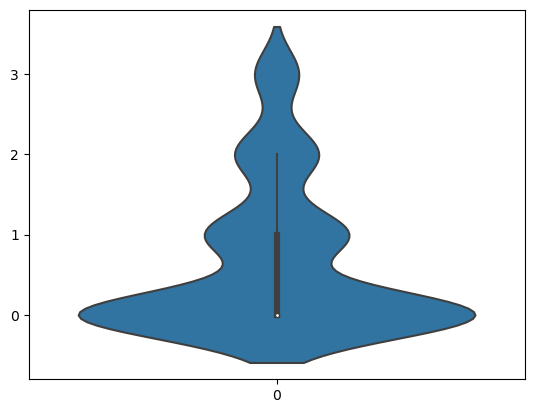

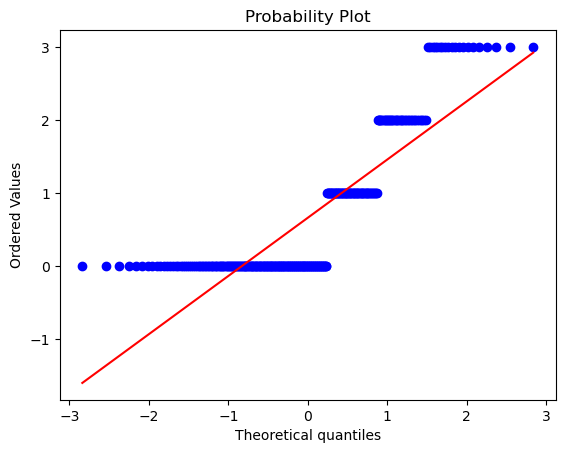

,Nb_obs,Moyenne,Max,Min,std,var,Q1,Q2,Q3
age,303,54.438944,77.0,29.0,9.038662,81.697419,48.0,56.0,61.0
trestbps,303,131.689769,200.0,94.0,17.599748,309.751120,120.0,130.0,140.0
chol,303,246.693069,564.0,126.0,51.776918,2680.849190,211.0,241.0,275.0
thalach,303,149.607261,202.0,71.0,22.875003,523.265775,133.5,153.0,166.0
oldpeak,303,1.039604,6.2,0.0,1.161075,1.348095,0.0,0.8,1.6
ca,303,0.663366,3.0,0.0,0.934375,0.873058,0.0,0.0,1.0


In [134]:
def statDescFinal(base):
    graphique_quanti(base)
    result = statDesc(base)
    return result

statDescFinal(df)

## Automatisation de la description des variables quantitatives

In [12]:
# Liste des variables quantitatives
liste_var_quanti = df.select_dtypes(include=["number"]).columns.tolist()

In [13]:
liste_var_quanti

['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']